**PROJECT OF ADULT INCOME**

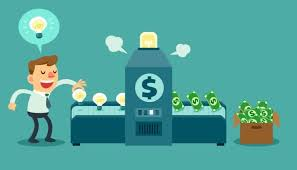

**NAME: ISSAC SUNIL**

**1.Overview of the Problem Statement:**

The goal is to predict whether a person earns more than $50K per year based on their demographic and work-related attributes.

**2.Objective:**

Classify individuals into <=50K or >50K income groups.Analyze the impact of features like age, education, occupation, and working hours.
Apply machine learning models for accurate prediction.

**3.Data Description:**
Data Set Link:https://www.kaggle.com/datasets/serpilturanyksel/adult-income

Features: Age, Education, Occupation, Gender, Hours-per-week, etc.



**Libraries used in the dataset analysis and modeling**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

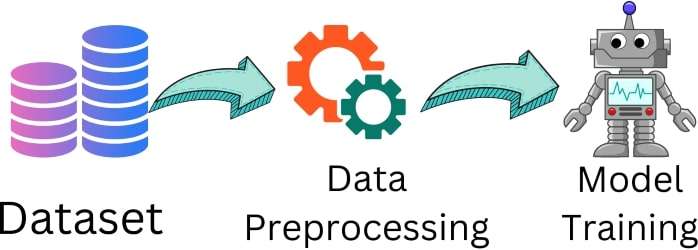

**LOAD THE DATASET**

In [29]:
data=pd.read_csv('/content/adult11.csv')
df=pd.DataFrame(data)

In [7]:
#to finding the first five data
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [34]:
#to find the last five data
df.tail(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


**INFO AND DESCRIBE**

In [35]:
#to get the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [36]:
#to generate the summary of statistics of DataFrame
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


MISSING VALUES

In [37]:
#to find the missing value of the dataframe
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [38]:
#to drop the missing values
df.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [39]:
#to handle duplicates
df.duplicated().sum()

np.int64(52)

In [40]:
#to remove duplicates
df=df.drop_duplicates()

Finding the null value:

In [41]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [8]:
y=df['hours-per-week']
y

,hours-per-week
0,40
1,50
2,40
3,40
4,30
...,...
48837,38
48838,40
48839,40
48840,20


In [9]:
x=df.drop('hours-per-week',axis=1)

In [10]:
x.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'native-country', 'salary'],
      dtype='object')

In [12]:
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'salary']

**APPLYING ONE HOT ENCODER**

In [13]:
df_pandas_encoded=pd.get_dummies(df,columns=['workclass','education','marital-status','occupation','relationship','race','gender','native-country','salary'],drop_first=True)


In [14]:
encoder=OneHotEncoder(sparse_output=False)
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()


In [15]:
df_encoded=pd.DataFrame(encoder.fit_transform(df[categorical_columns]))


In [16]:

one_hot_encoded_data=encoder.fit_transform(df[categorical_columns])

one_hot_encoded_df=pd.DataFrame(one_hot_encoded_data,columns=encoder.get_feature_names_out(categorical_columns))
df_sklearn_encoded=pd.concat([df.drop(categorical_columns,axis=1),one_hot_encoded_df],axis=1)



In [32]:
df1= df_sklearn_encoded

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 110 entries, age to salary_>50K
dtypes: float64(110)
memory usage: 41.0 MB


In [53]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [19]:
df=df.dropna

In [20]:
df1.shape

(48842, 110)

In [34]:
num_columns=df1.select_dtypes(include=['int64','float64'])
num_columns

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,salary_<=50K,salary_>50K
0,25.0,226802.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,38.0,89814.0,9.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,28.0,336951.0,12.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,44.0,160323.0,10.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,18.0,103497.0,10.0,0.0,0.0,32.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,257302.0,12.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48838,40.0,154374.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48839,58.0,151910.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48840,22.0,201490.0,9.0,0.0,0.0,32.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [22]:
df1.isna().sum()

,0
age,0
fnlwgt,0
education-num,0
capital-gain,0
capital-loss,0
...,...
native-country_United-States,0
native-country_Vietnam,0
native-country_Yugoslavia,0
salary_<=50K,0


GAIN INSIGHTS INTO DATA DISTRIBUTION,RELATIONSHIPS,AND POTENTIAL.

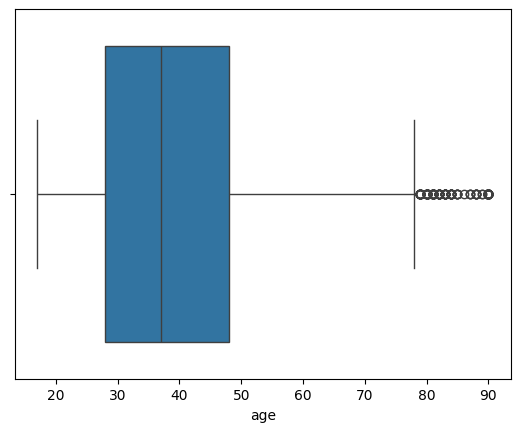

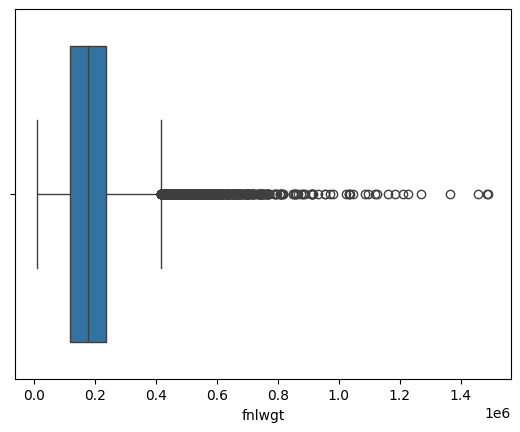

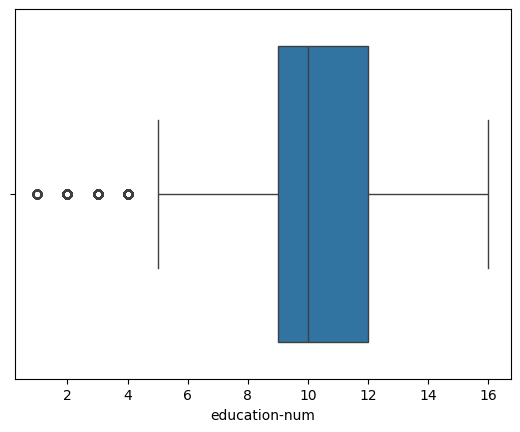

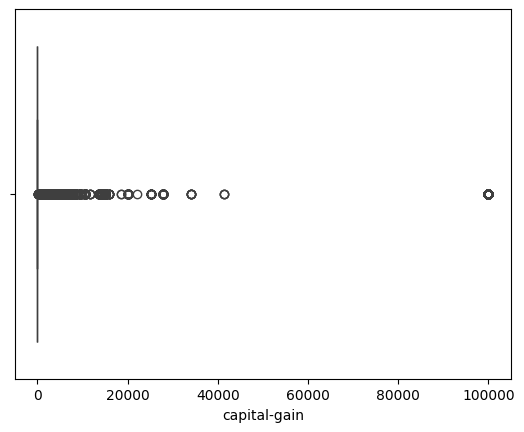

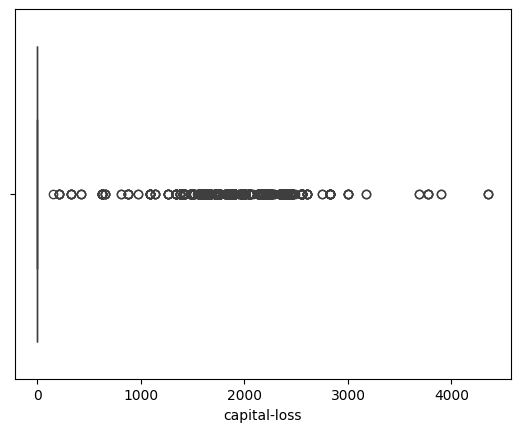

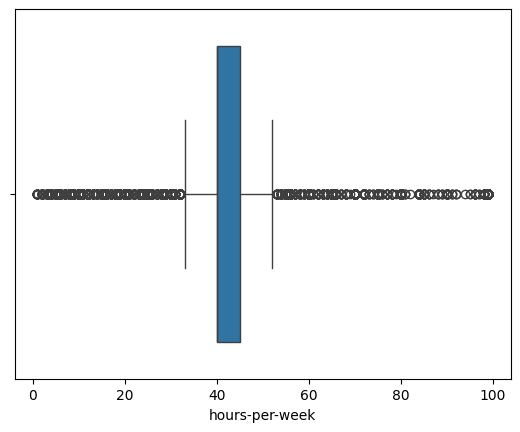

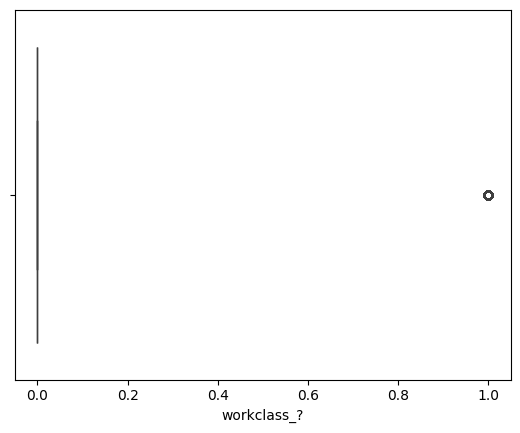

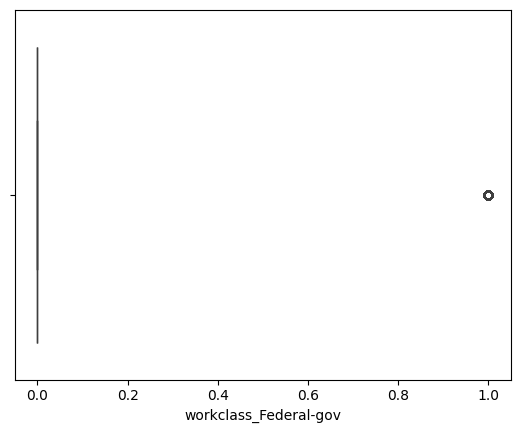

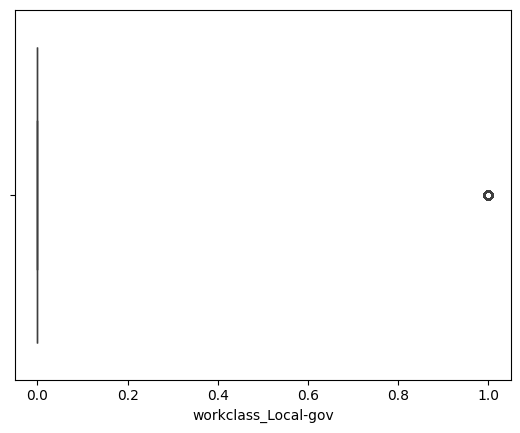

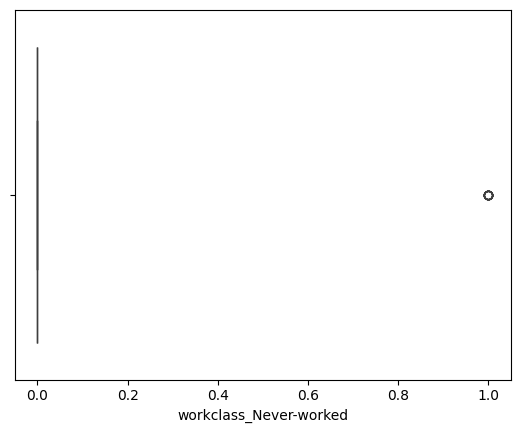

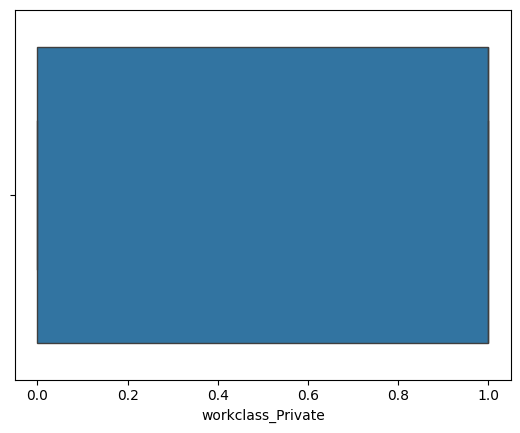

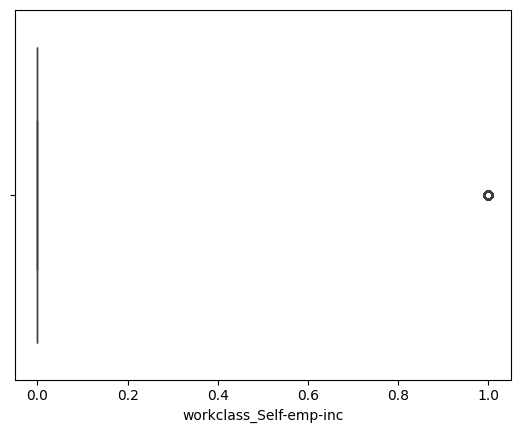

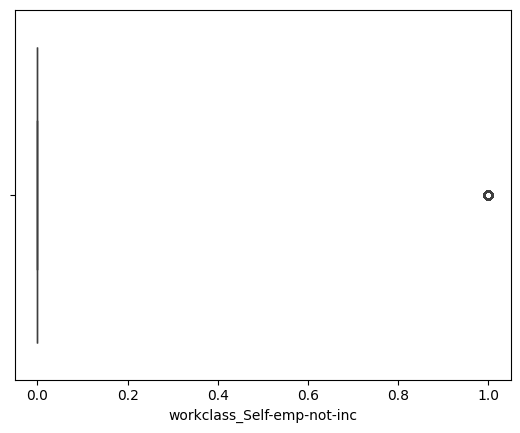

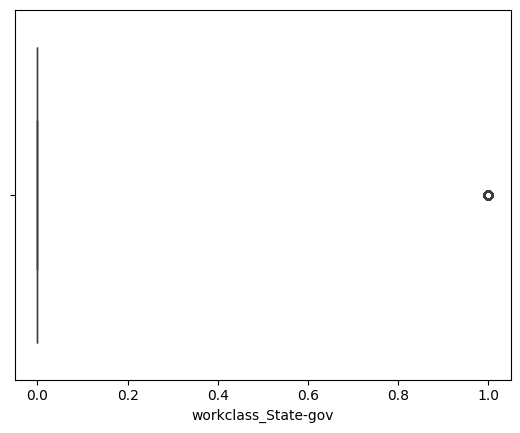

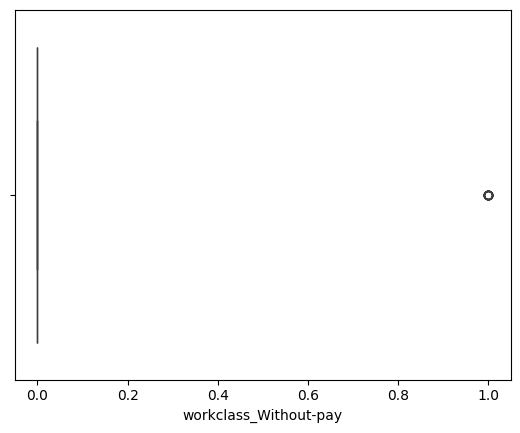

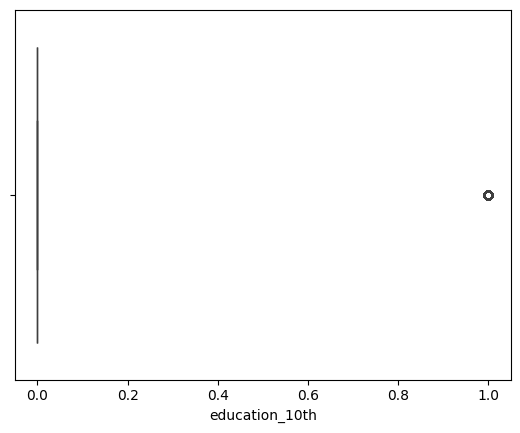

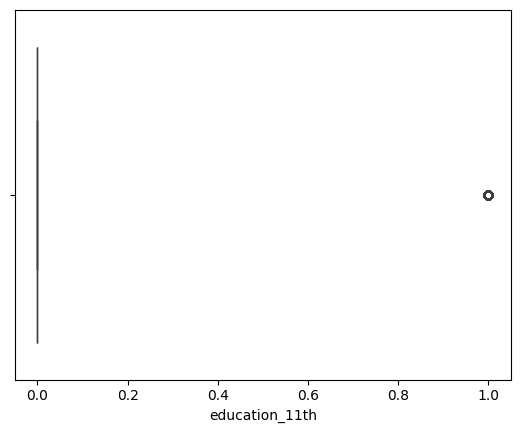

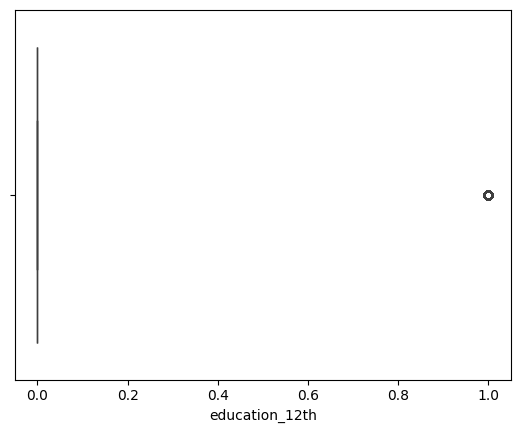

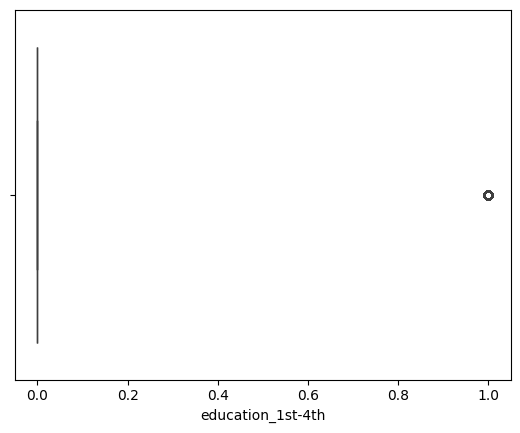

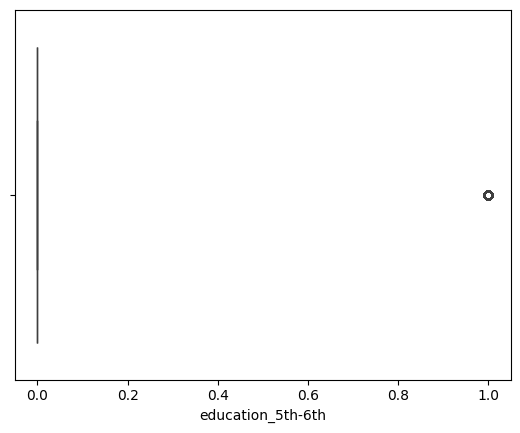

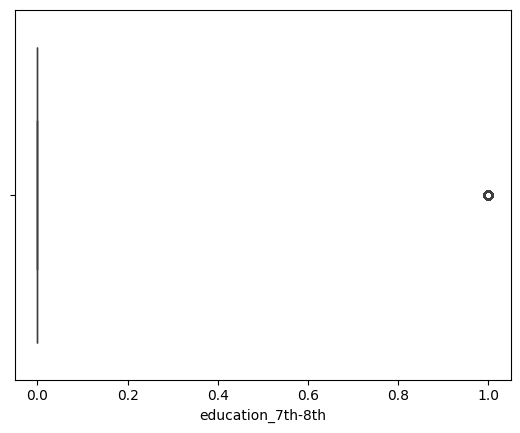

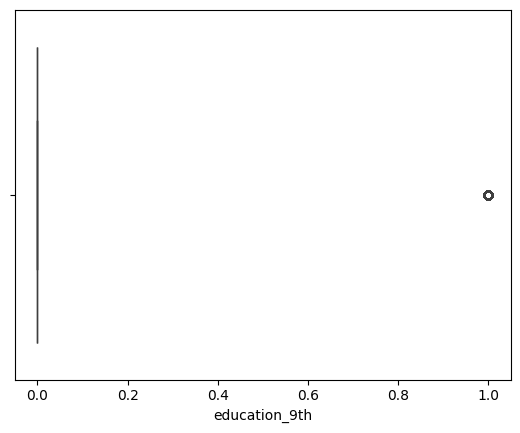

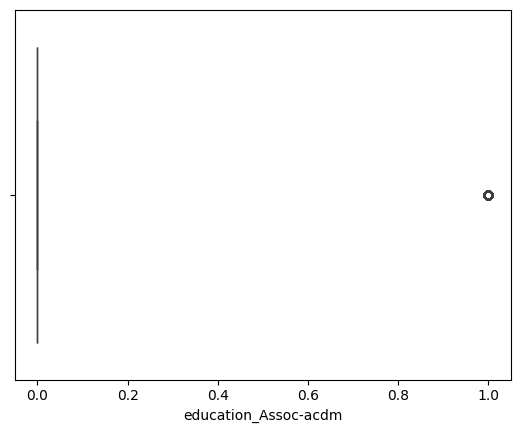

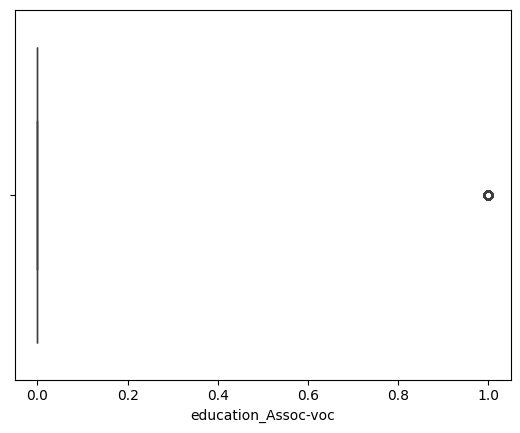

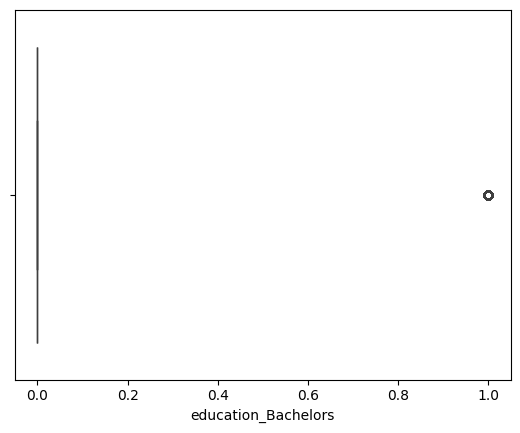

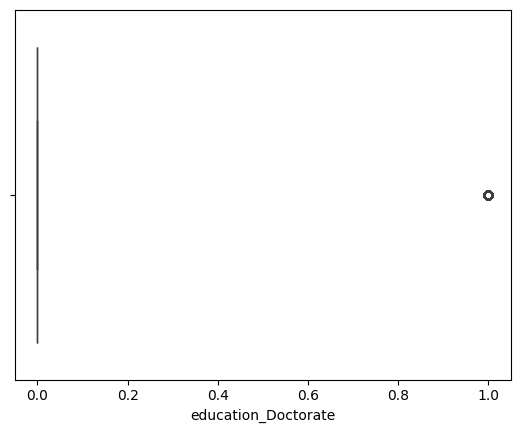

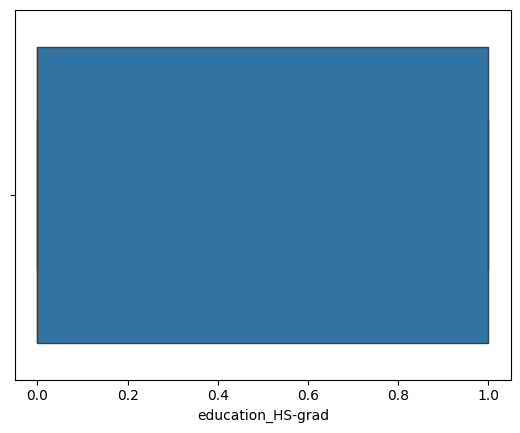

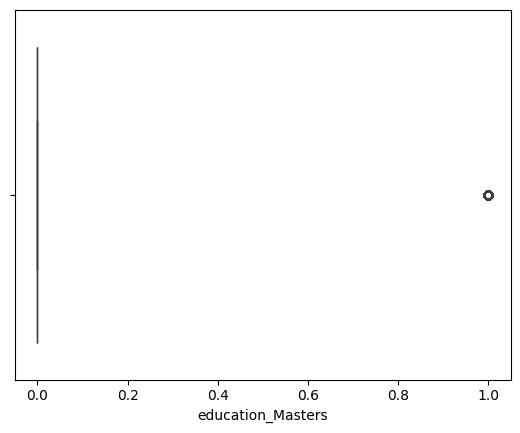

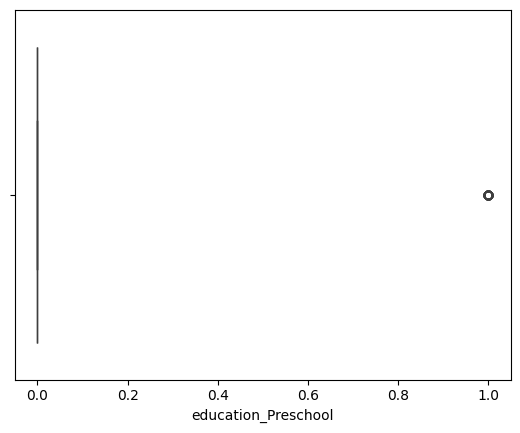

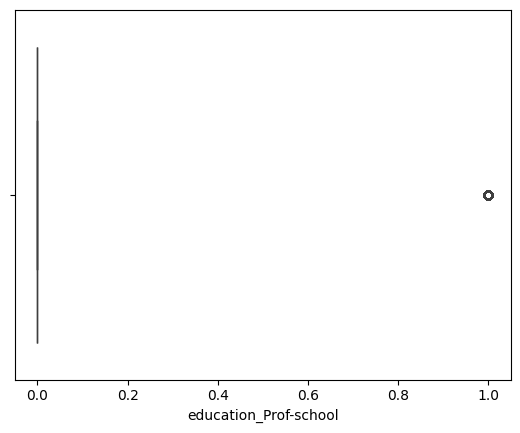

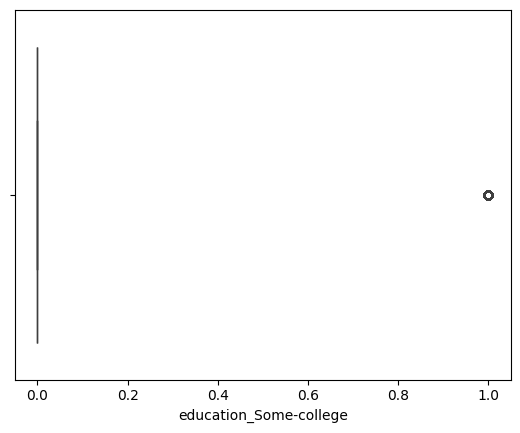

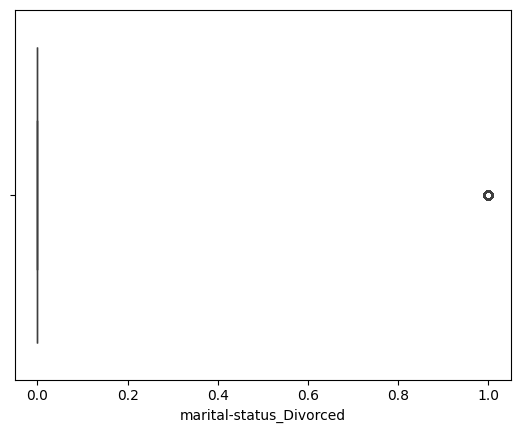

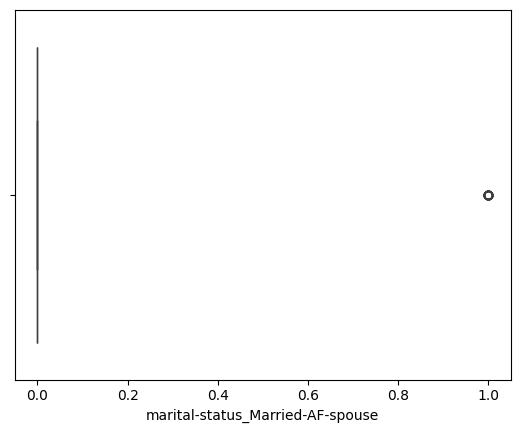

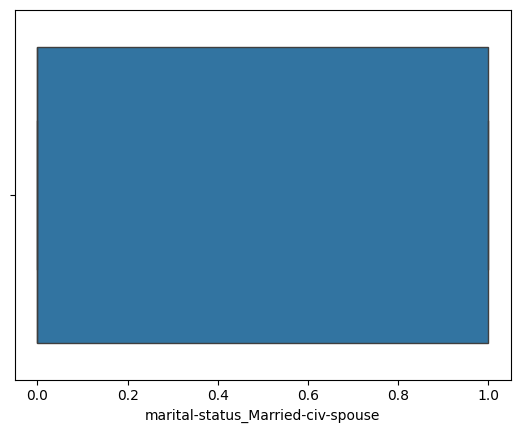

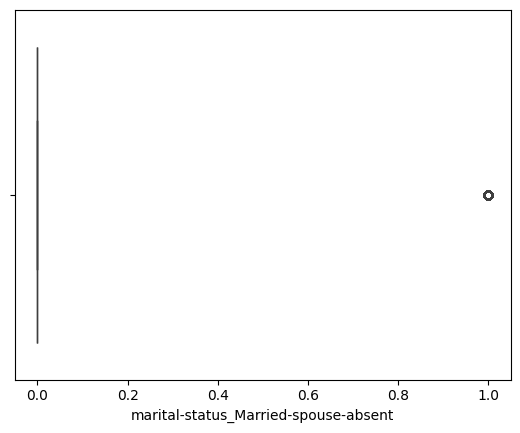

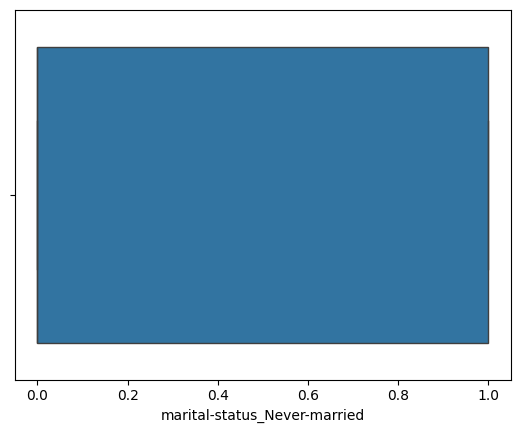

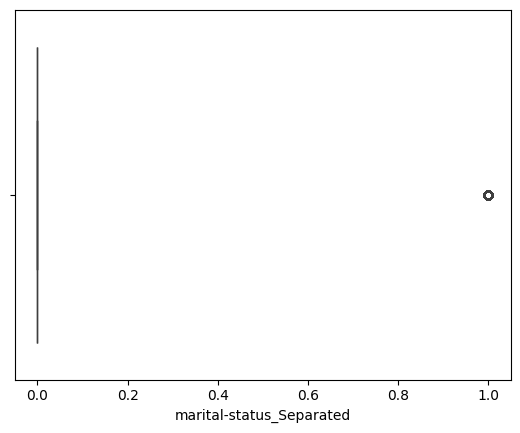

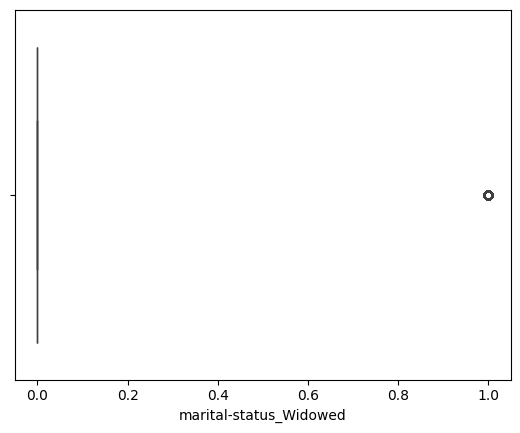

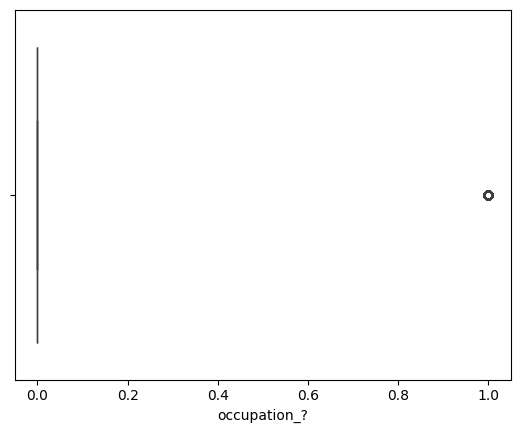

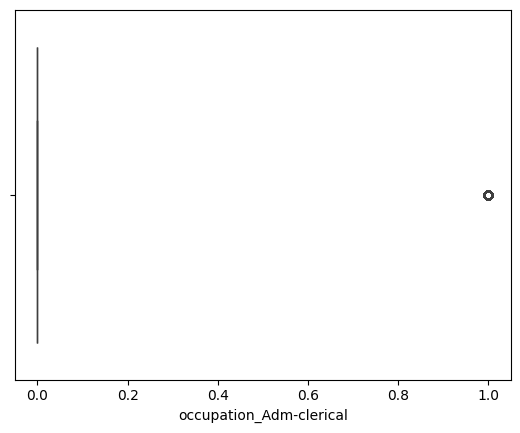

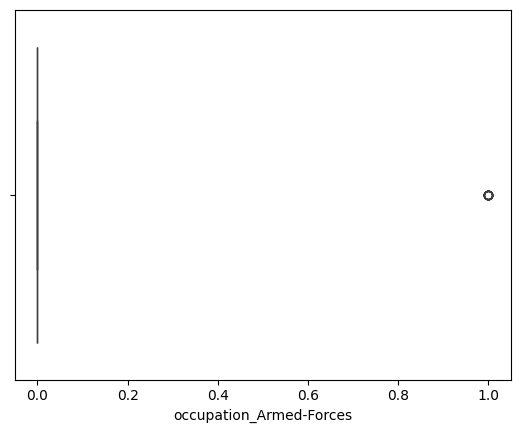

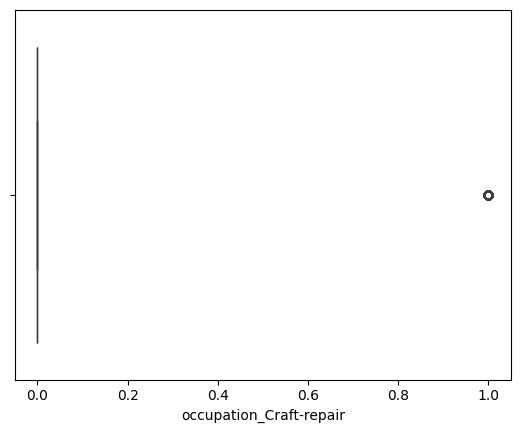

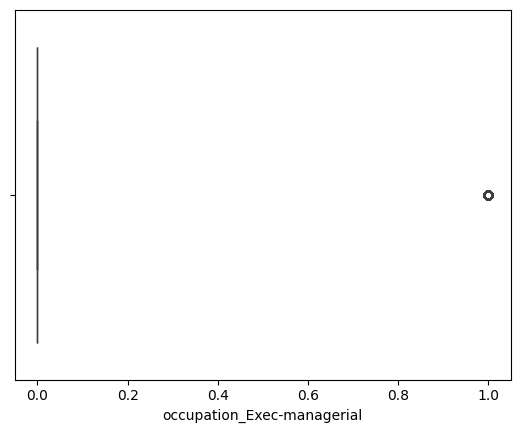

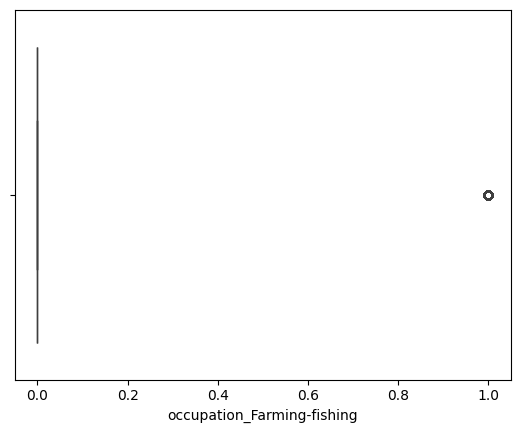

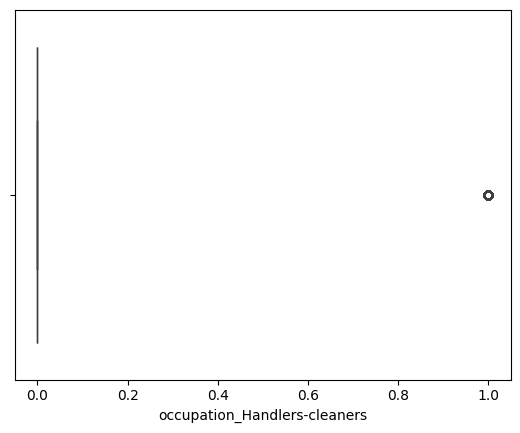

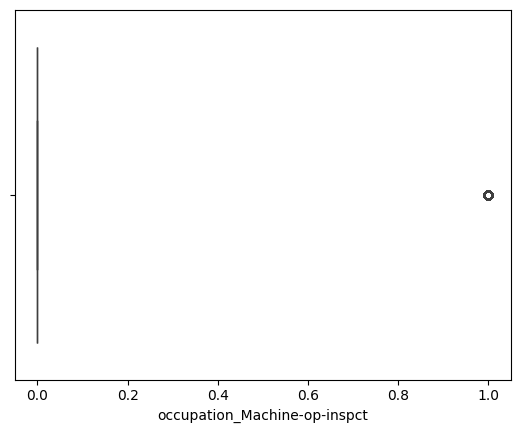

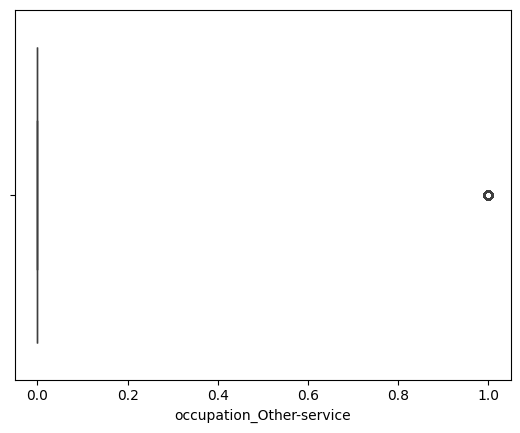

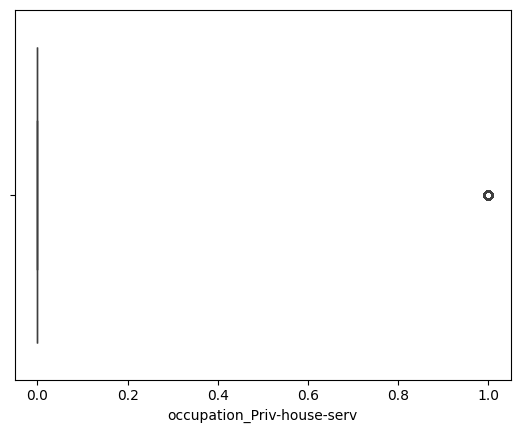

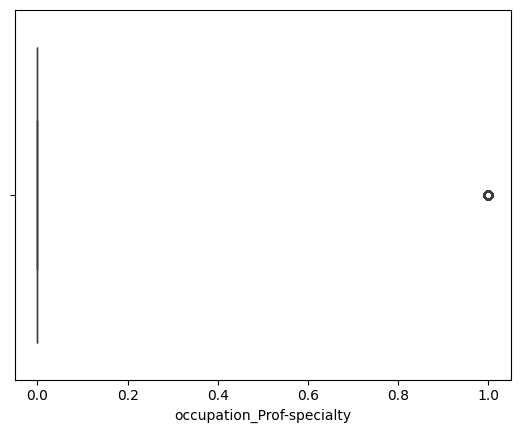

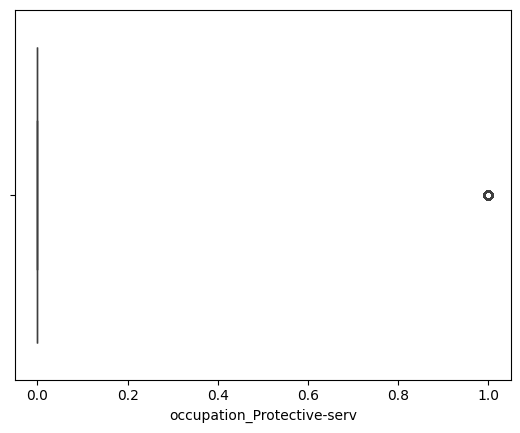

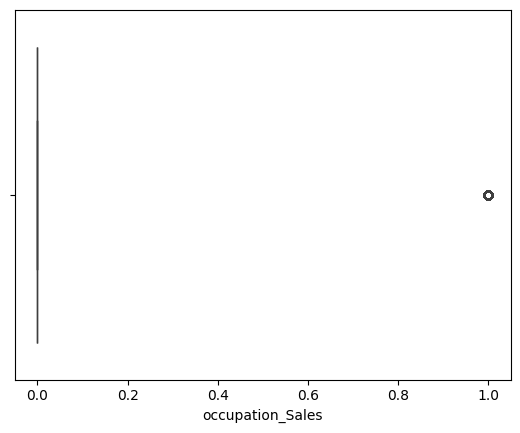

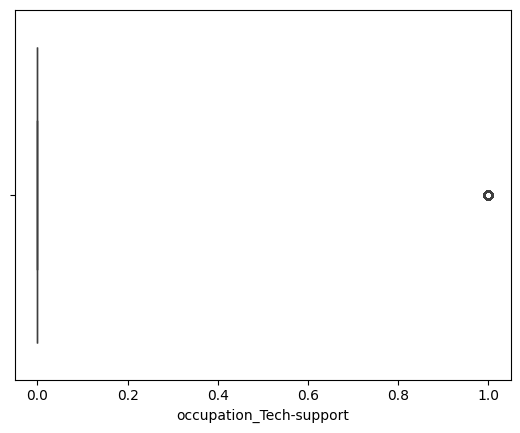

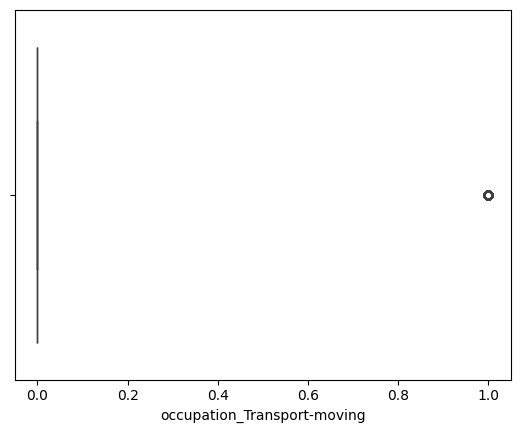

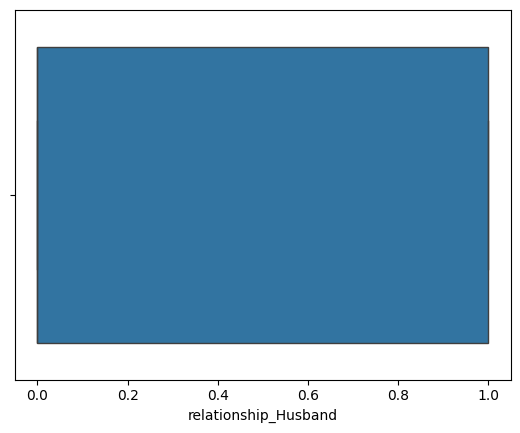

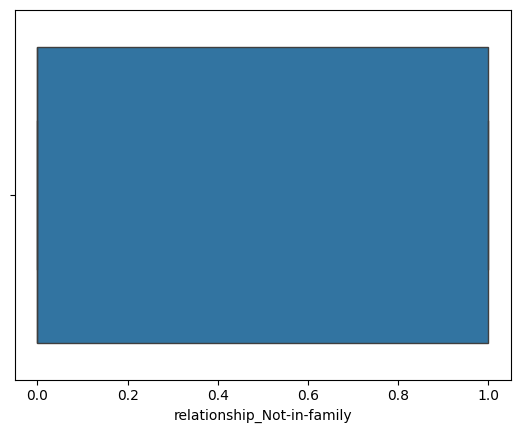

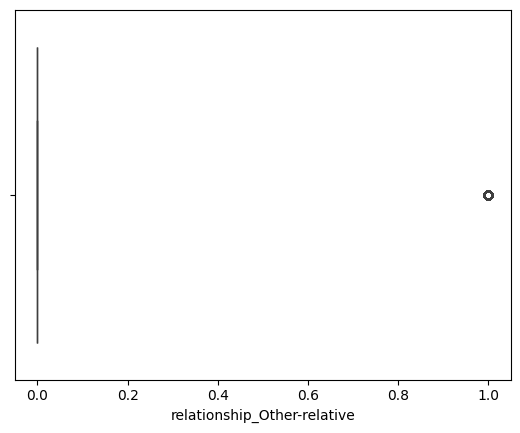

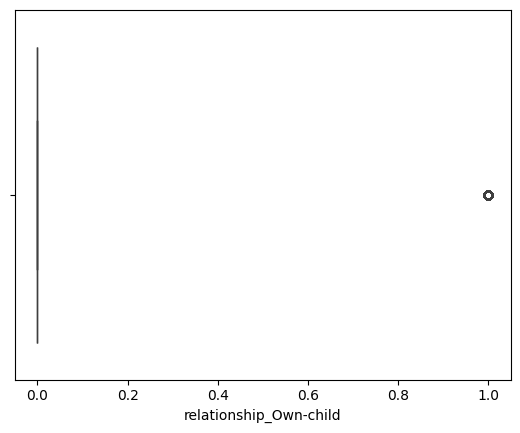

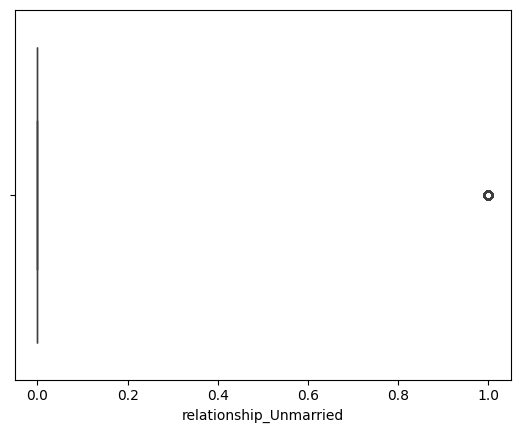

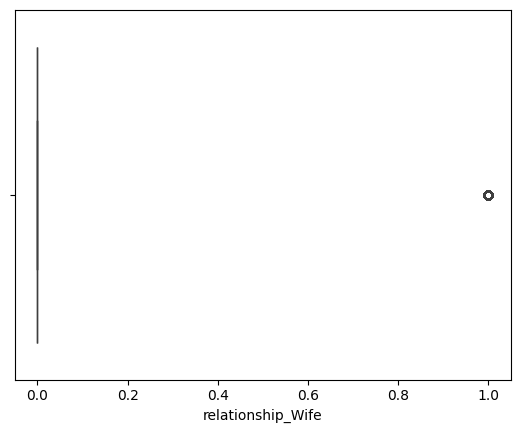

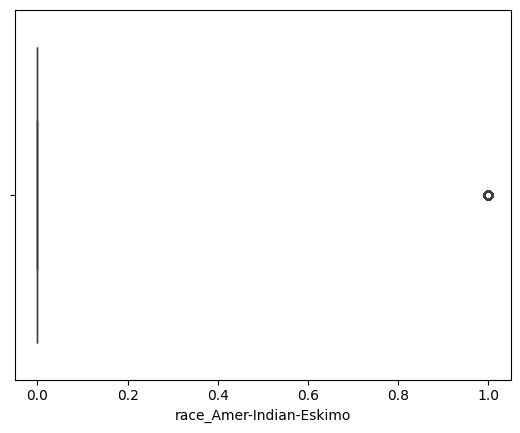

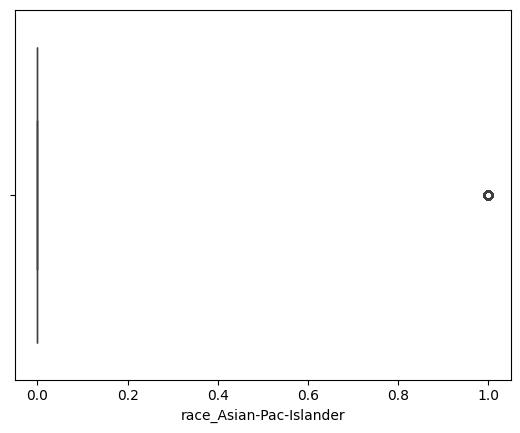

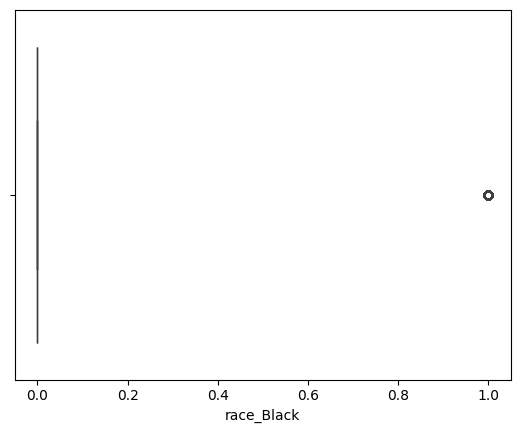

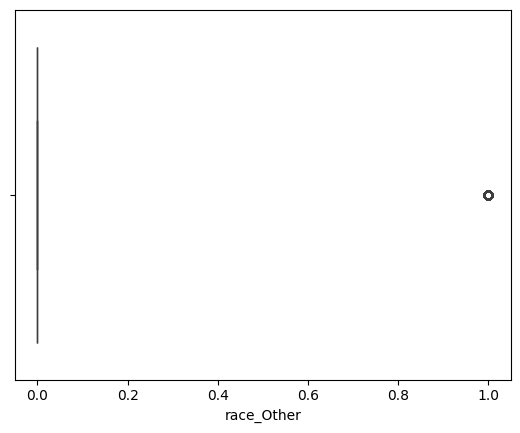

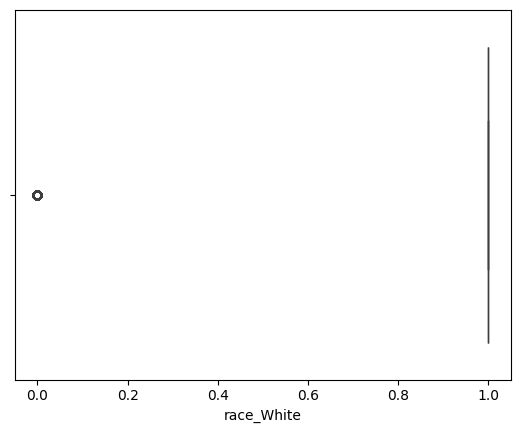

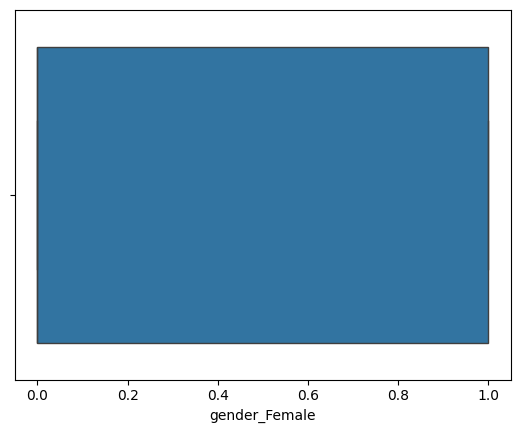

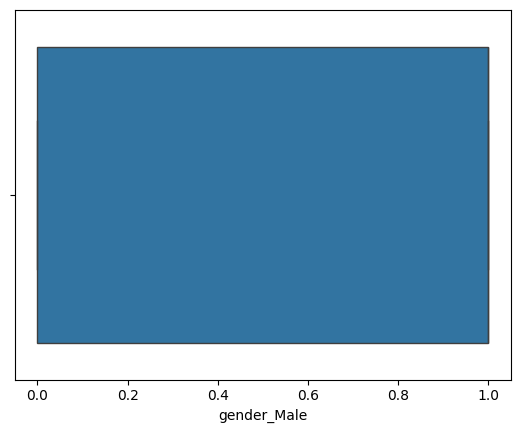

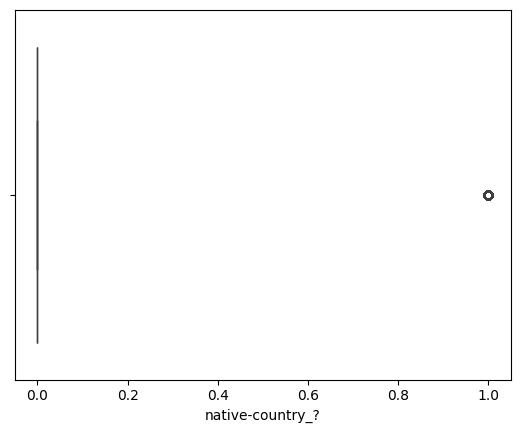

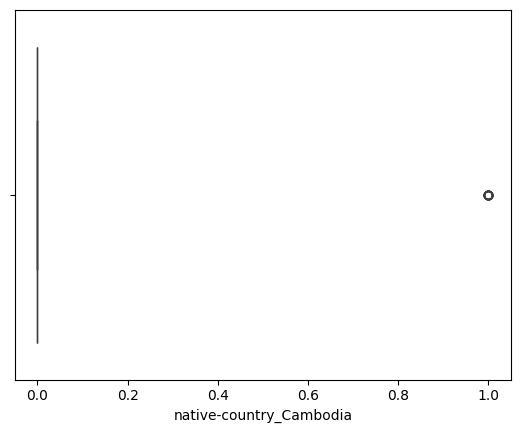

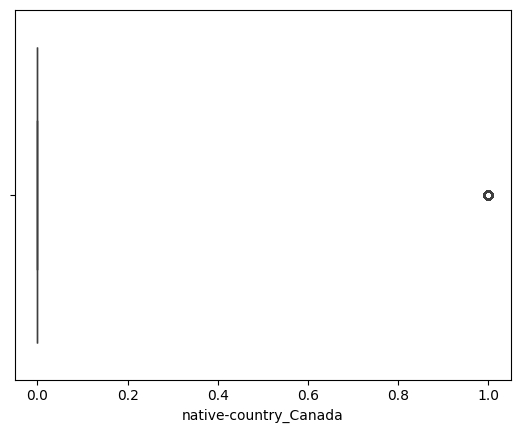

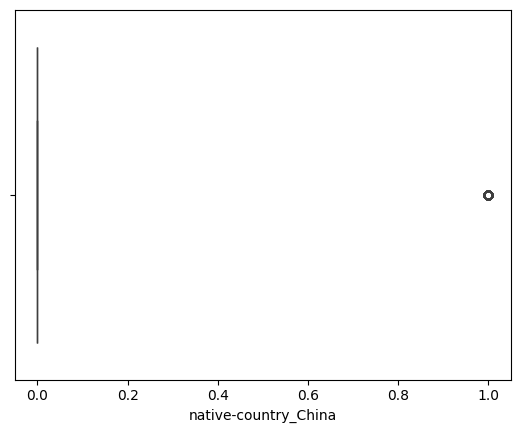

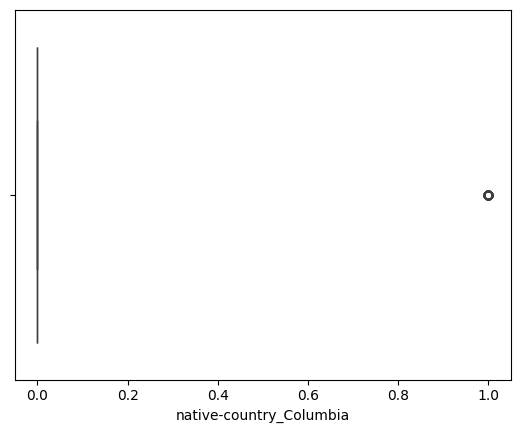

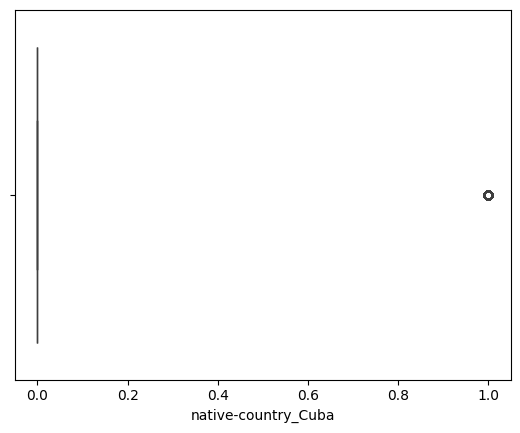

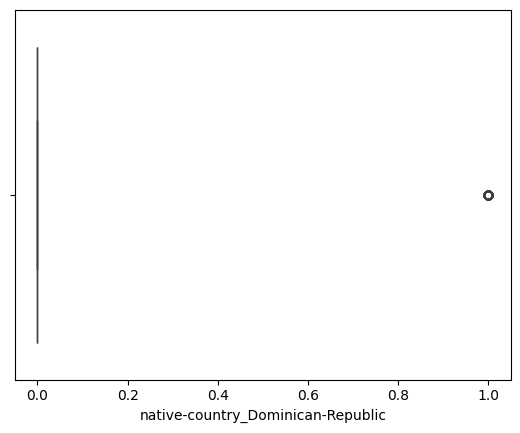

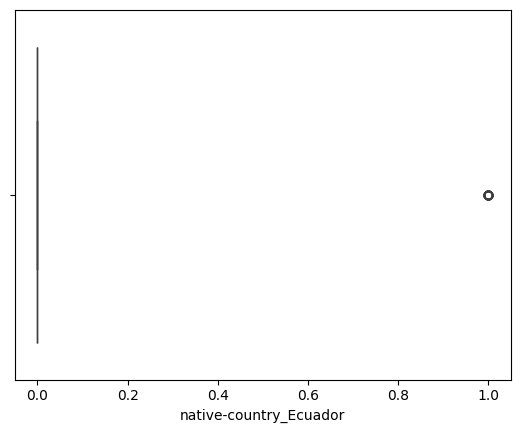

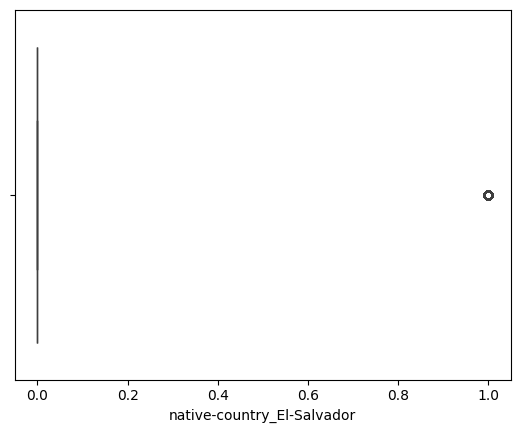

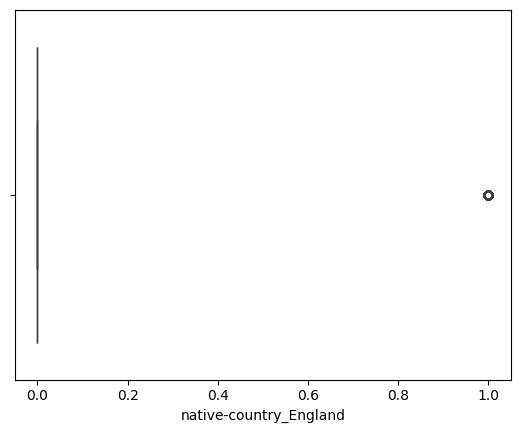

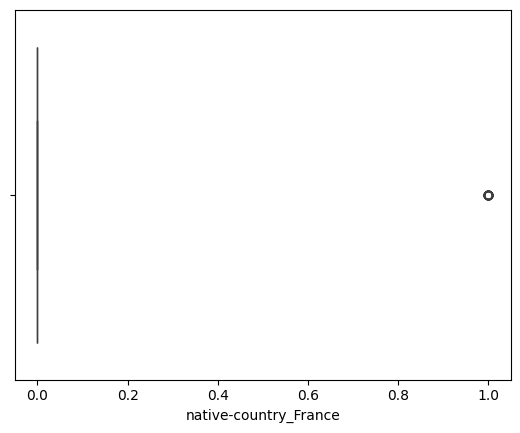

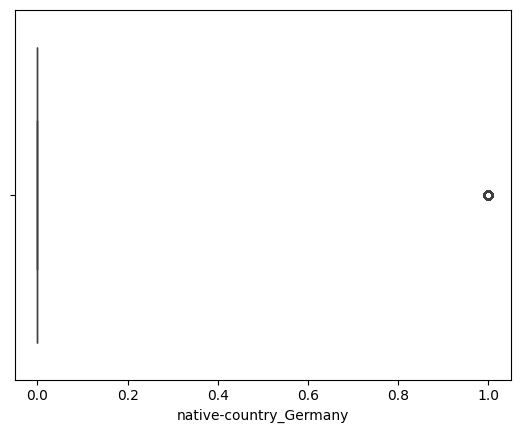

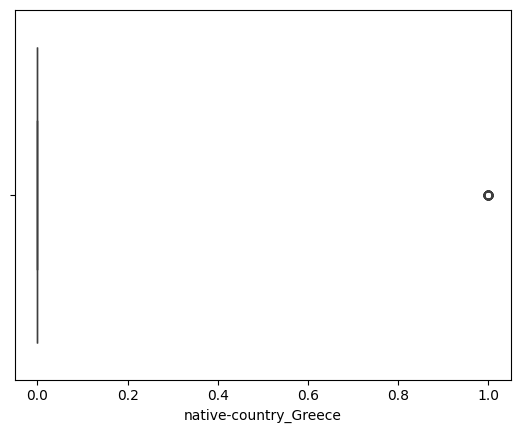

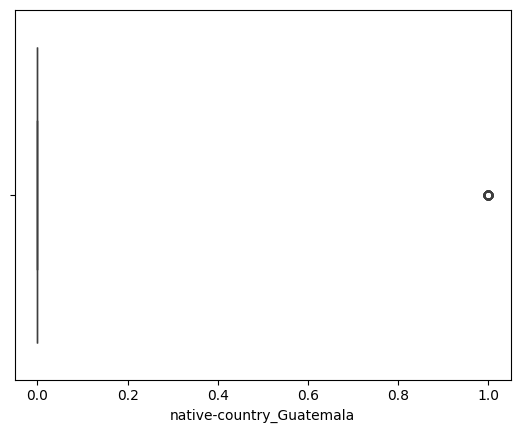

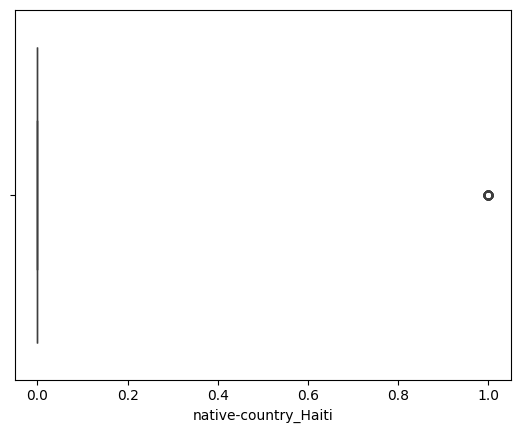

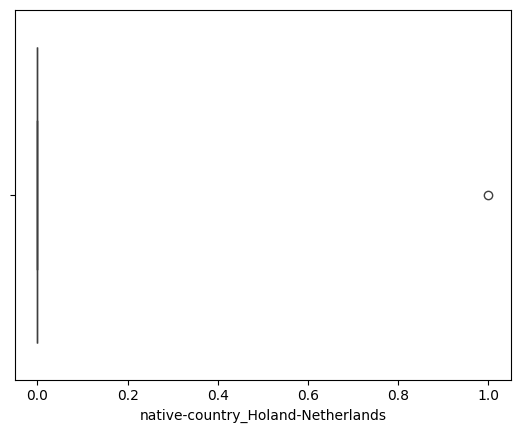

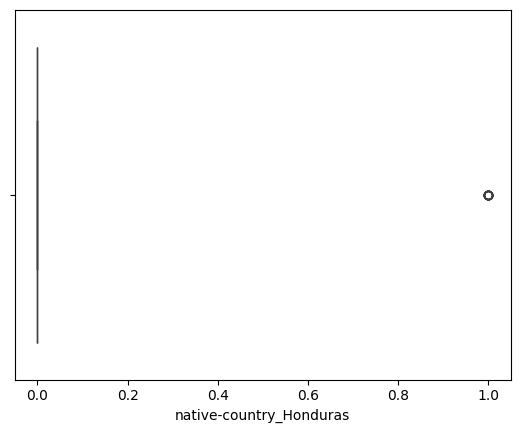

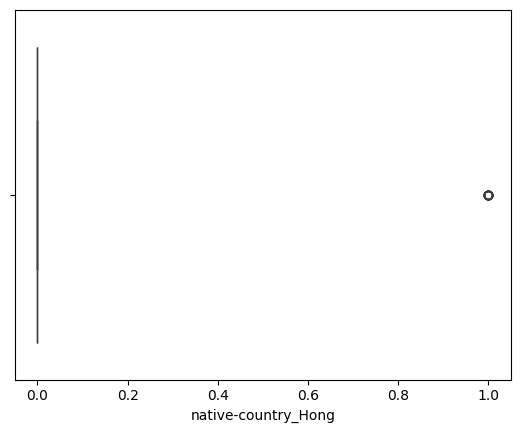

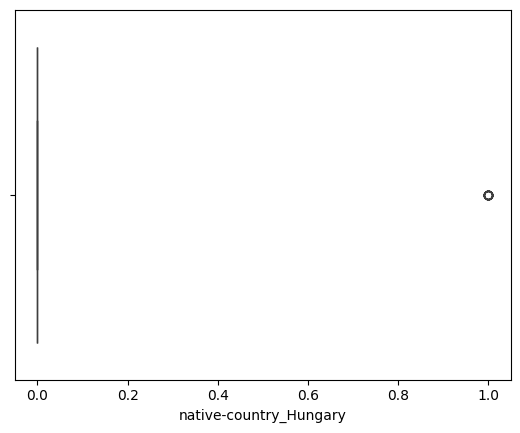

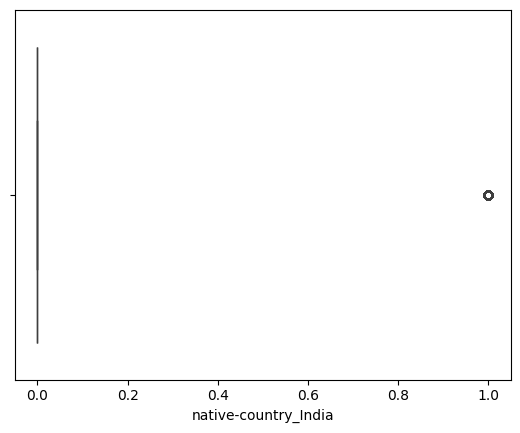

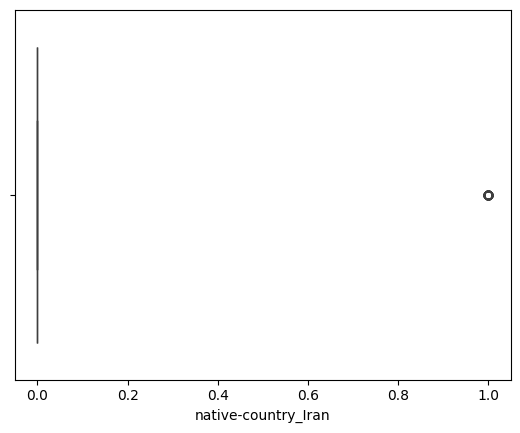

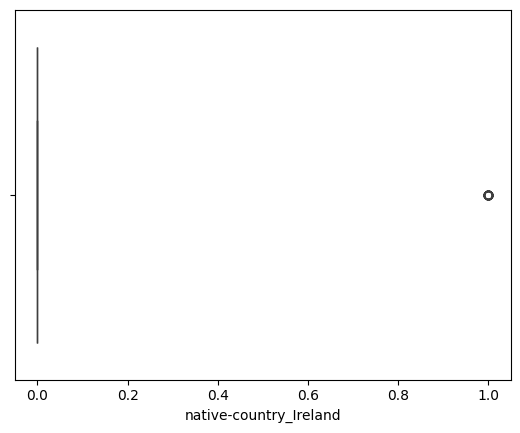

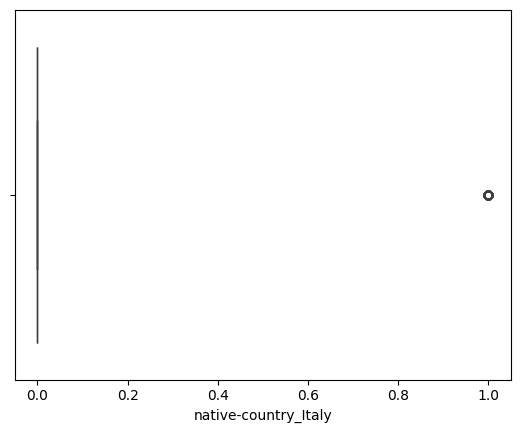

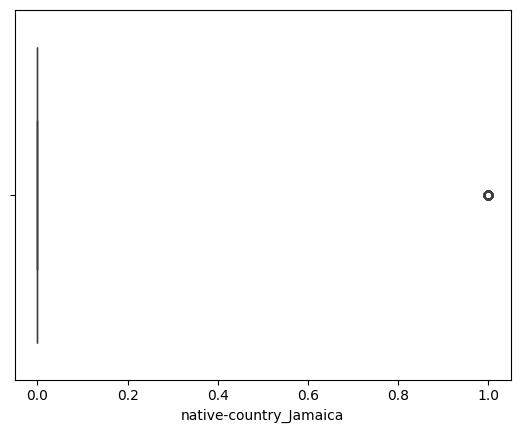

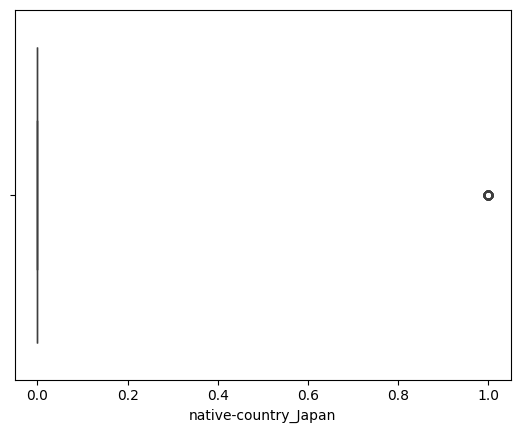

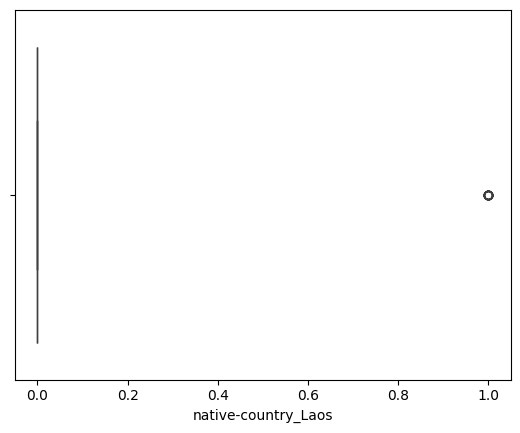

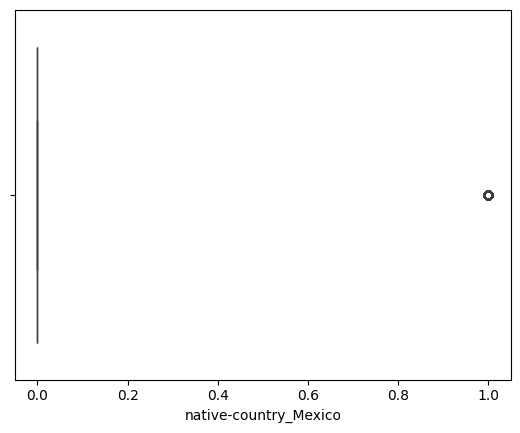

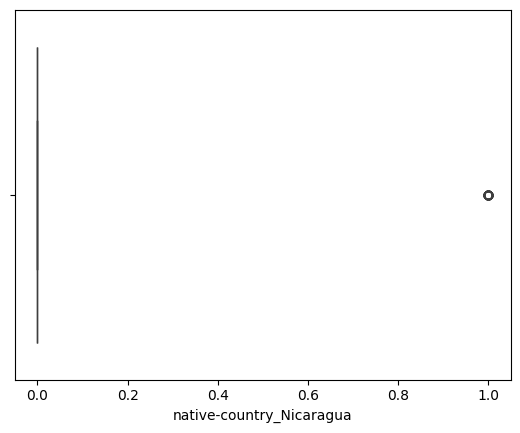

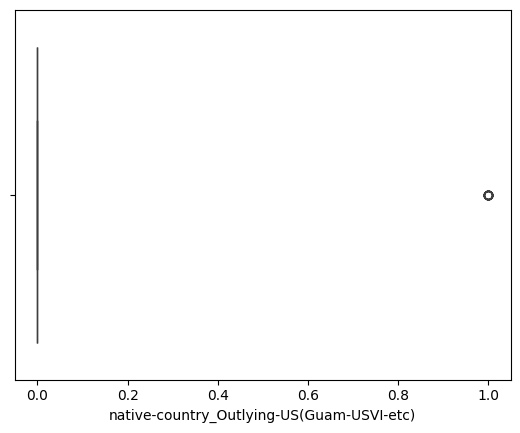

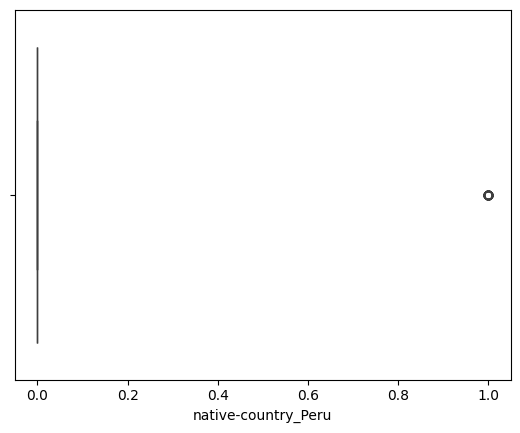

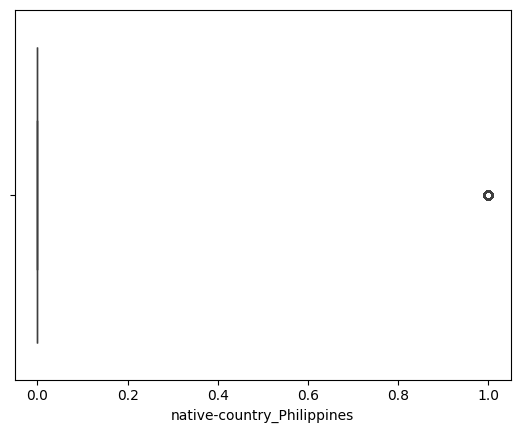

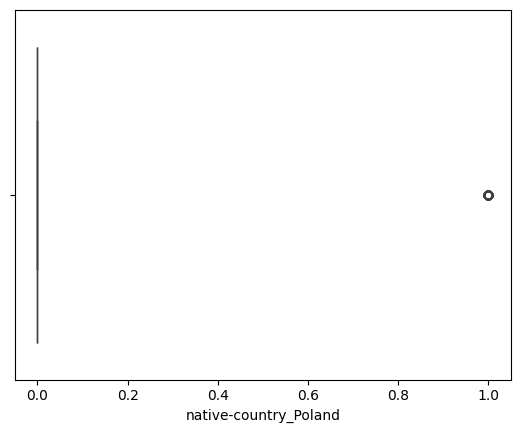

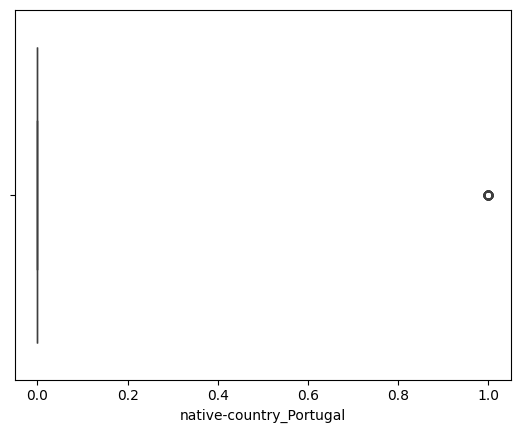

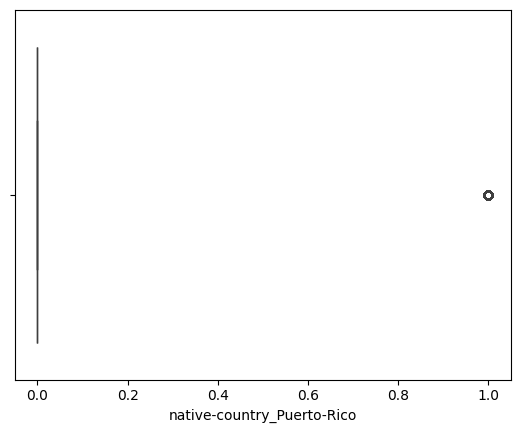

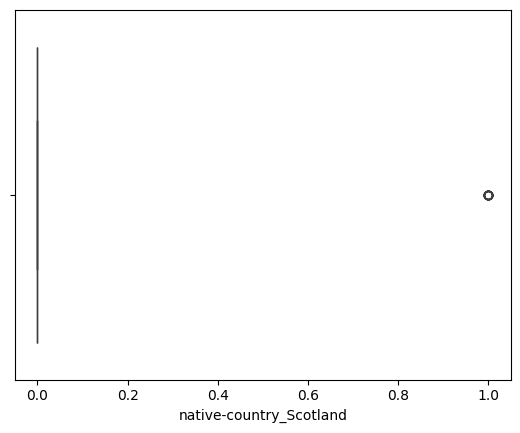

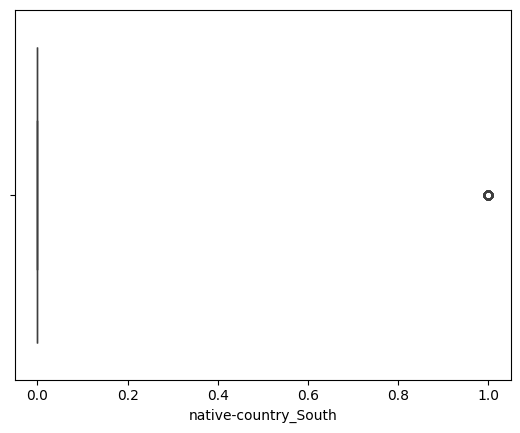

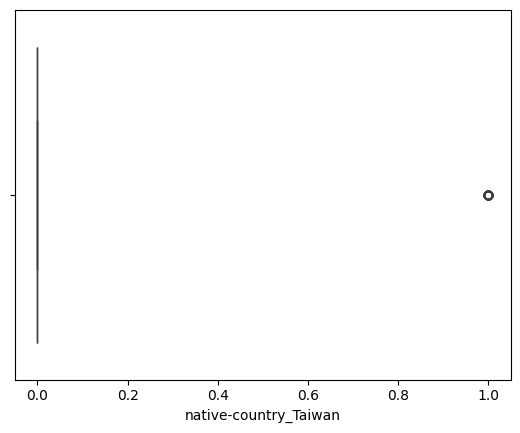

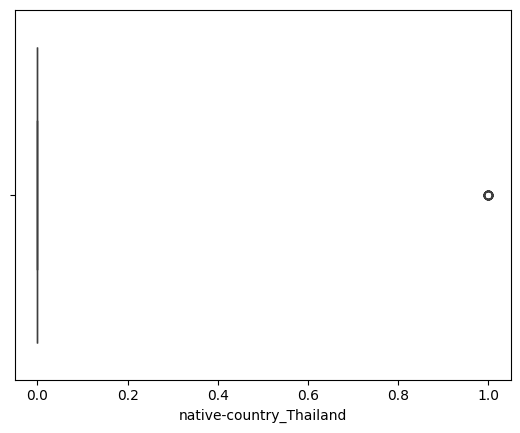

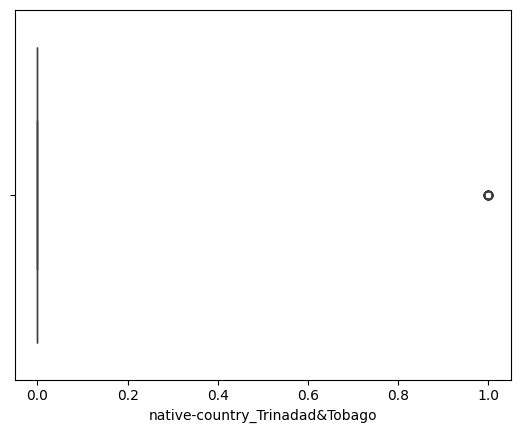

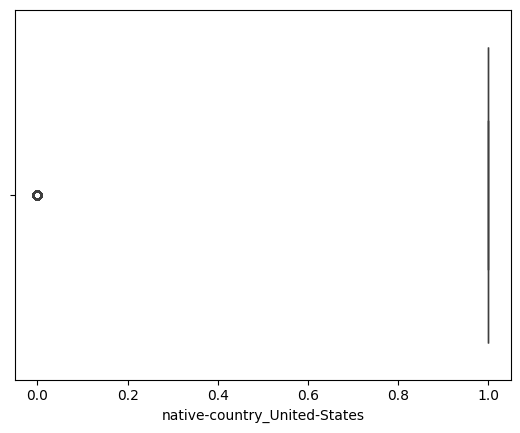

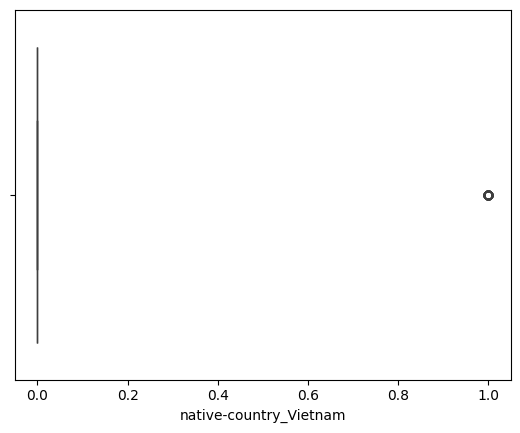

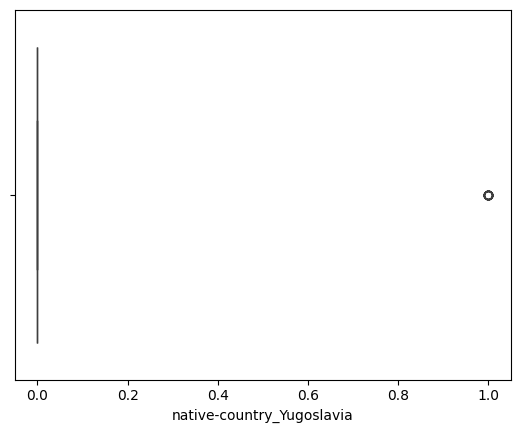

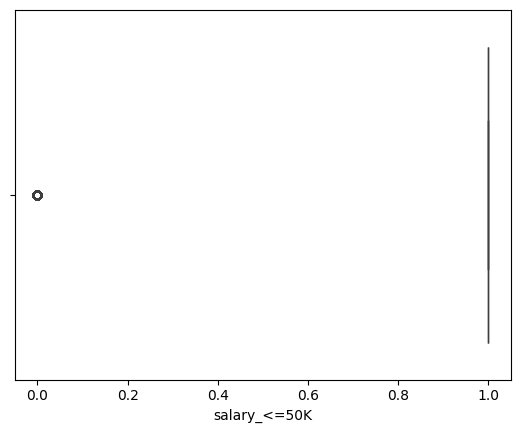

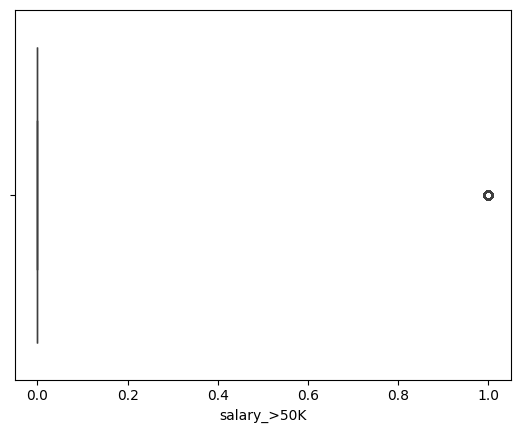

In [23]:
for column in num_columns.columns:
  sns.boxplot(data=num_columns,x=column)
  plt.show()

**HANDLING OUTLIERS**

In [24]:
def handling_outliers(df1):
  for col in df1.select_dtypes(include=['int64','float64']).columns:
    Q1=df1[col].quantile(0.25)
    Q3=df1[col].quantile(0.75)
    IQR=Q3-Q1
    Lower_bound=Q1-(1.5*IQR)
    Upper_bound=Q3+(1.5*IQR)
    df1[col]=df1[col].apply(lambda x:Lower_bound if x<Lower_bound else (Upper_bound if x>Upper_bound else x))
  return df1

<Axes: >

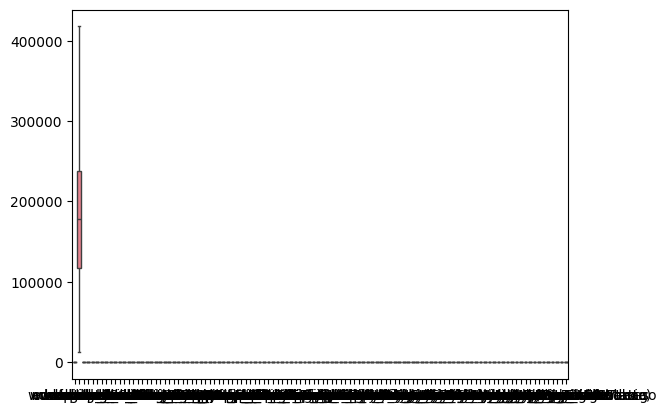

In [25]:
df2=handling_outliers(df1)
df2.head()
sns.boxplot(df2)

BOXPLOT

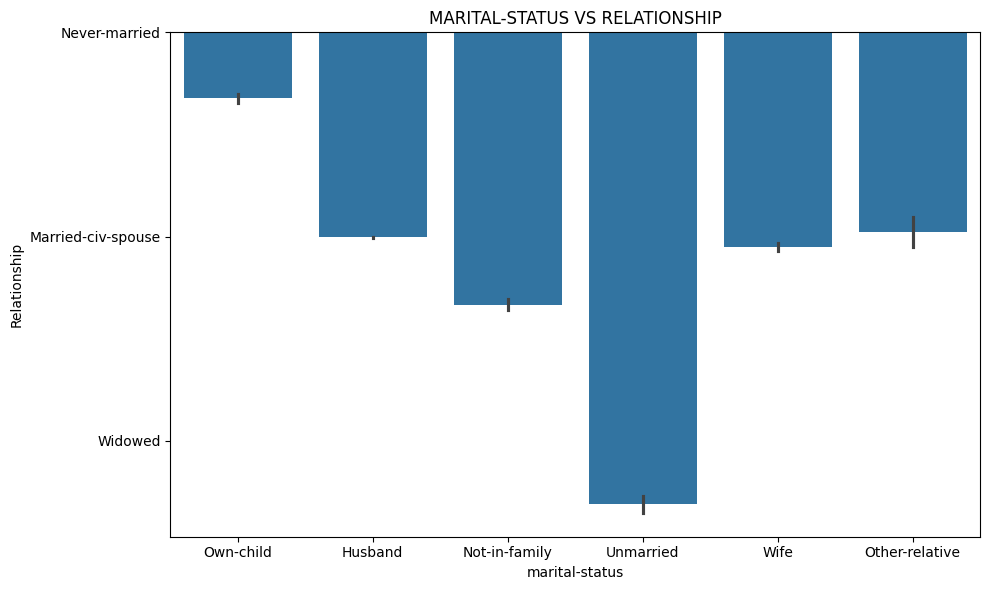

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, y='marital-status', x='relationship')
plt.title('MARITAL-STATUS VS RELATIONSHIP')
plt.xlabel('marital-status')
plt.ylabel('Relationship')
plt.tight_layout()
plt.show()

Lineplot

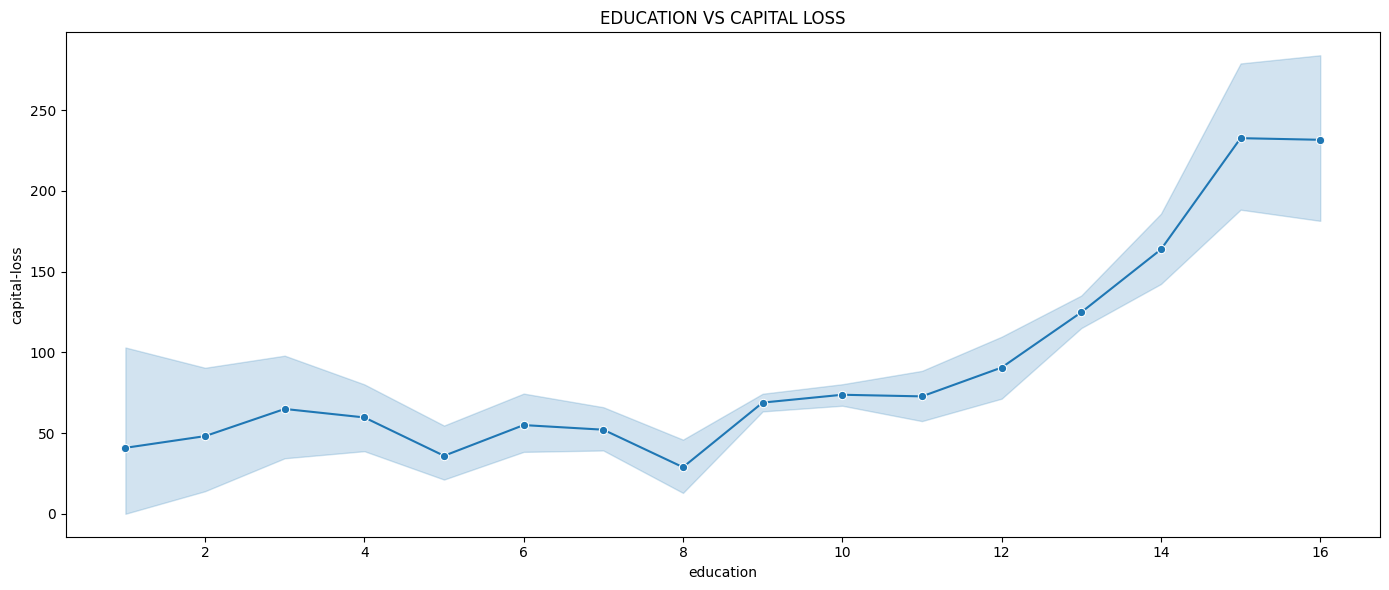

In [31]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='education-num', y='capital-loss', marker='o')
plt.title('EDUCATION VS CAPITAL LOSS')
plt.xlabel('education')
plt.ylabel('capital-loss')
plt.tight_layout()
plt.show()


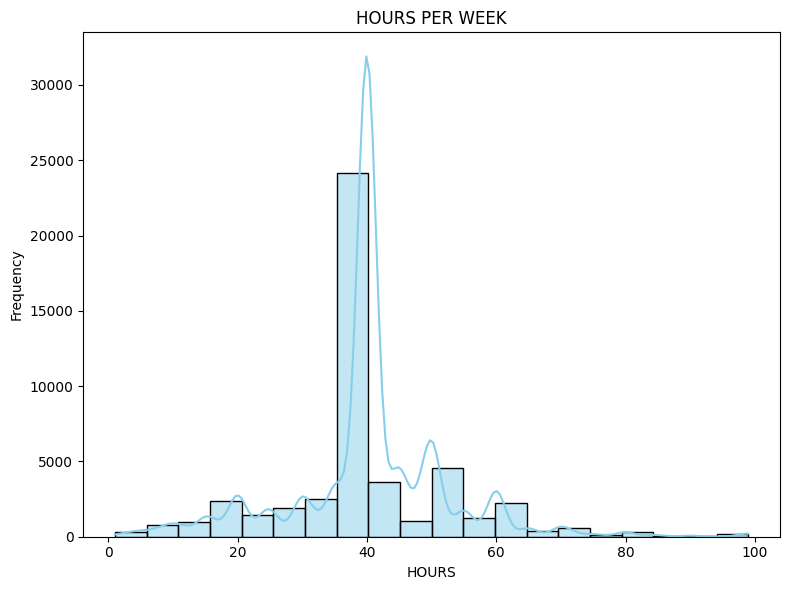

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='hours-per-week', bins=20, kde=True, color='skyblue')
plt.title('HOURS PER WEEK')
plt.xlabel('HOURS')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

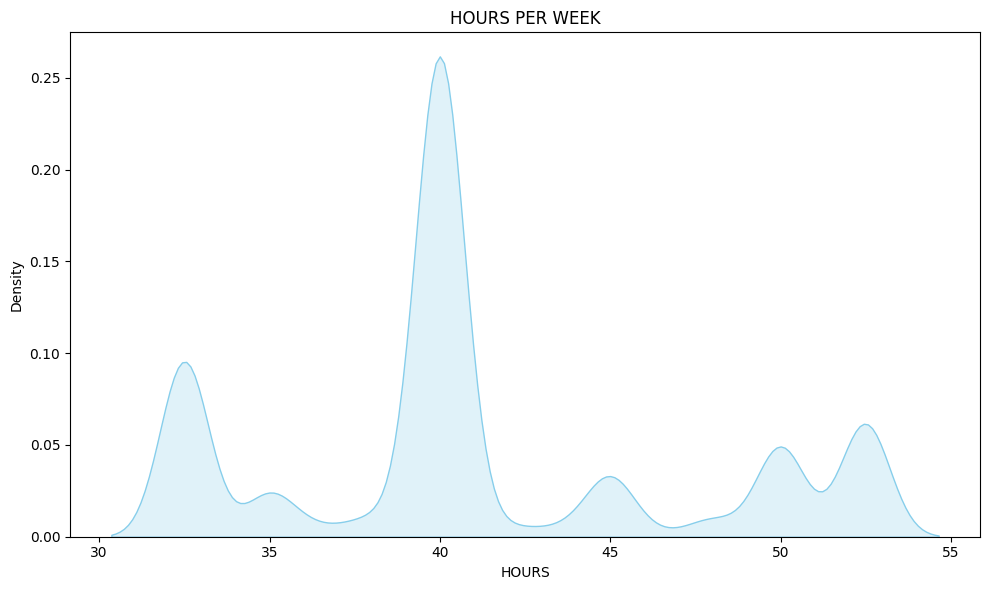

In [35]:
#KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df1, x='hours-per-week', fill=True, color='skyblue')
plt.title('HOURS PER WEEK')
plt.xlabel('HOURS')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [74]:
a=df2.corr()
a

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,salary_<=50K,salary_>50K
age,1.000000,-0.078419,0.041999,NaN,NaN,0.093160,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,-0.078419,1.000000,-0.034922,NaN,NaN,-0.020307,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,0.041999,-0.034922,1.000000,NaN,NaN,0.182325,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-gain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_United-States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
native-country_Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
native-country_Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_<=50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Heatmap

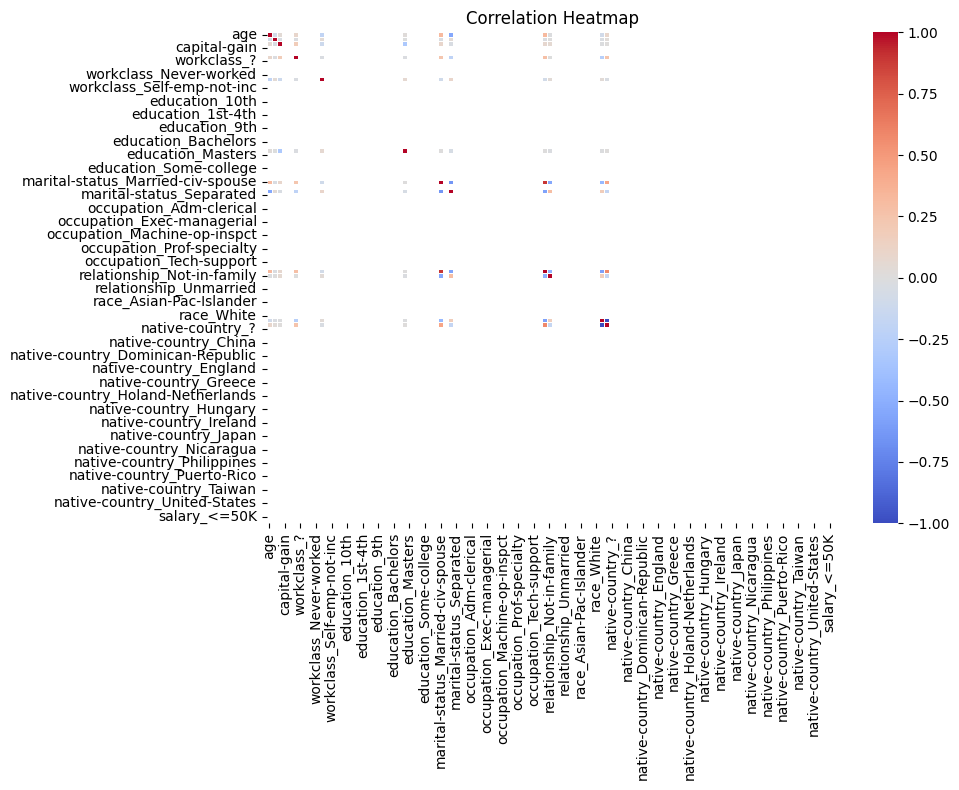

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(a,cmap='coolwarm',linewidth=0.5,fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Violin plot

Text(0, 0.5, 'HOURS PER WEEK')

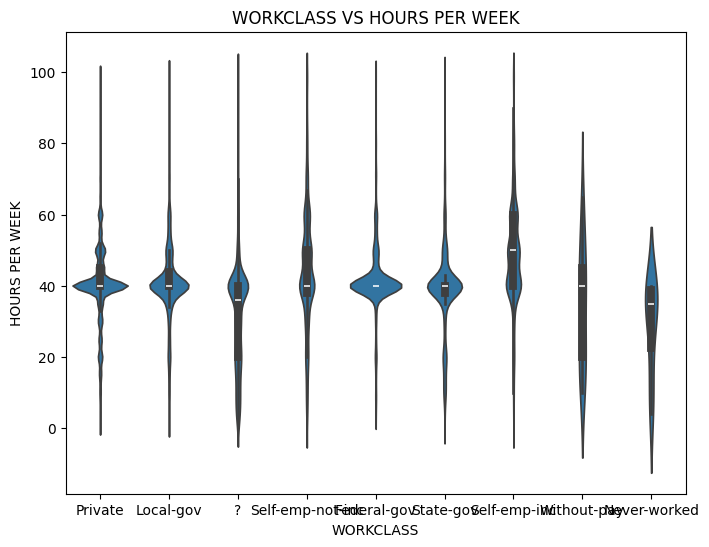

In [38]:
#violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x='workclass',y='hours-per-week',data=df)
plt.title('WORKCLASS VS HOURS PER WEEK')
plt.xlabel('WORKCLASS')
plt.ylabel('HOURS PER WEEK')

**Skewness**

In [39]:
df1.skew()

,0
age,0.515820
fnlwgt,0.555106
education-num,-0.035567
capital-gain,0.000000
capital-loss,0.000000
...,...
native-country_United-States,0.000000
native-country_Vietnam,0.000000
native-country_Yugoslavia,0.000000
salary_<=50K,0.000000


In [40]:
X=df1.drop(columns='hours-per-week',axis=1)
y=df1['hours-per-week']

Feature Selection

In [76]:
selecter=SelectKBest(score_func=f_regression,k=70)
X_new=selecter.fit_transform(X,y)
Selected_features=X.columns[selecter.get_support()]
feature_score=pd.DataFrame({'Feature':X.columns,'Score':selecter.scores_}).sort_values(by='Score',ascending=False)

In [77]:
print(feature_score)

                               Feature        Score
52                relationship_Husband  4047.877869
64                         gender_Male  3390.039418
63                       gender_Female  3390.039418
32   marital-status_Married-civ-spouse  2962.233304
34        marital-status_Never-married  2245.720337
..                                 ...          ...
104       native-country_United-States     0.000000
105             native-country_Vietnam     0.000000
106          native-country_Yugoslavia     0.000000
107                       salary_<=50K     0.000000
108                        salary_>50K     0.000000

[109 rows x 2 columns]


In [78]:
X_Selected=X[Selected_features]

In [79]:
X_Selected.columns

Index(['age', 'fnlwgt', 'education-num', 'workclass_Private',
       'education_HS-grad', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'gender_Female', 'gender_Male',
       'native-country_?', 'native-country_Cambodia', 'native-country_Canada',
       'native-country_China', 'native-country_Columbia',
       'native-country_Cuba', 'native-country_Dominican-Republic',
       'native-country_Ecuador', 'native-country_El-Salvador',
       'native-country_England', 'native-country_France',
       

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X_Selected,y,test_size=0.2,random_state=42)


**Feature Scaling**

In [81]:
Ss=StandardScaler()
X_train_scaled=Ss.fit_transform(X_train)
X_test_scaled=Ss.fit_transform(X_test)

In [95]:
models={'Linear Regression':LinearRegression(),
        'Random Forest':RandomForestRegressor(random_state=42),
        'Support Vector Machine':SVR(),
        }

**Build the ML Model:**

In [96]:
results={}
for name,model in models.items():
  model.fit(X_train_scaled,y_train)
  y_pred=model.predict(X_test_scaled)
  results[name]={'MSE':mean_squared_error(y_test,y_pred),
                 'MAE':mean_absolute_error(y_test,y_pred),
                 'RMSE':np.sqrt(mean_squared_error(y_test,y_pred)),
                 'R2':r2_score(y_test,y_pred)}


In [97]:
print("\nModel Performance:")
for model_name,metrics in results.items():
  print(f"{model_name}:")
  for metric_name,value in metrics.items():
    print(f"{metric_name}:{value:.4f}")


Model Performance:
Linear Regression:
MSE:31.9860
MAE:4.5374
RMSE:5.6556
R2:0.1444
Random Forest:
MSE:34.3864
MAE:4.6439
RMSE:5.8640
R2:0.0802
Support Vector Machine:
MSE:33.3052
MAE:4.0460
RMSE:5.7711
R2:0.1091
